In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
import matplotlib.patches as mpatches
import seaborn as sns
warnings.filterwarnings('ignore')

In [2]:
# Loading the data and taking a quick look - will have to remove that last row later
# I copy/pasted the columns from the excel file onto 1 sheet and changed the column names to make them easier to call
df = pd.read_csv(r"C:/Users/Rigo/Futureshop_Views_Checkouts.csv")
demographics = pd.read_csv(r"C:/Users/Rigo/Futureshop_Demographics.csv")
df.tail()

,Date,Facebook_Views,Organic_Views,Youtube_Views,Facebook_Checkouts,Organic_Checkouts,Youtube_Checkouts
24,2/13/2015,4.088695,0.085,0.051,1.073049,0.014560,0.021444
25,2/14/2015,2.595216,0.098,0.030,1.102419,0.030911,0.015651
26,2/15/2015,2.889472,0.074,0.030,1.100895,0.021821,0.014037
27,2/16/2015,3.379900,0.040,0.010,1.068442,0.017516,0.012622
28,*figures in millions,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Looking at the demographics dataset
demographics.head()

,Age_Group,Male,Female
0,13-17,2.1,1.9
1,18-24,4.6,3.3
2,25-34,5.3,3.1
3,35-44,9.3,7.1
4,45-54,10.6,8.8


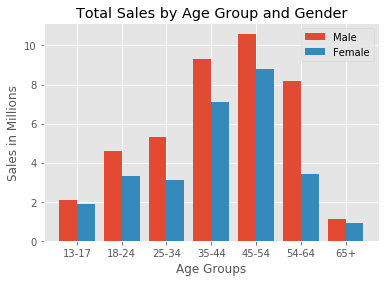

In [4]:
# This should be fairly straightforward to plot
# Here I created a vector of evenly spaced points with the same length as the dataset for the x-axis
n_groups = demographics.shape[0]
index=np.arange(n_groups)
bar_width = .4

#And then added labels, cleaned it up a bit and plotted it.
with plt.style.context('ggplot'):
    men = plt.bar(index, demographics.Male, bar_width,
                 label = 'Male')
    female = plt.bar(index + bar_width, demographics.Female, bar_width,
                 label = 'Female')
    plt.xlabel('Age Groups')
    plt.ylabel('Sales in Millions')
    plt.title('Total Sales by Age Group and Gender')
    plt.xticks(index + bar_width / 2, ('13-17', '18-24', '25-34', '35-44', '45-54', '54-64', '65+'))
    plt.legend()
    

    plt.show()

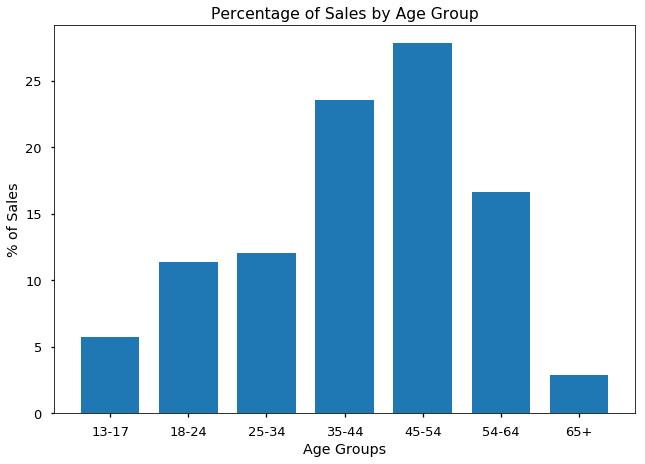

In [5]:
# We can pretty much see the pattern in the demographics but let's plot both genders together anyways
demographics['both_genders'] = demographics['Male']+demographics['Female']
demographics['bg_percent'] = 100 * demographics.both_genders / sum(demographics.both_genders)

n_groups = demographics.shape[0]
index=np.arange(n_groups)
bar_width=.75

with plt.style.context('seaborn-talk'):
    both_genders = plt.bar(index, demographics.bg_percent, bar_width)
    plt.xlabel('Age Groups')
    plt.ylabel('% of Sales')
    plt.title('Percentage of Sales by Age Group')
    plt.xticks(index, ('13-17', '18-24', '25-34', '35-44', '45-54', '54-64', '65+'))
    

    plt.show()

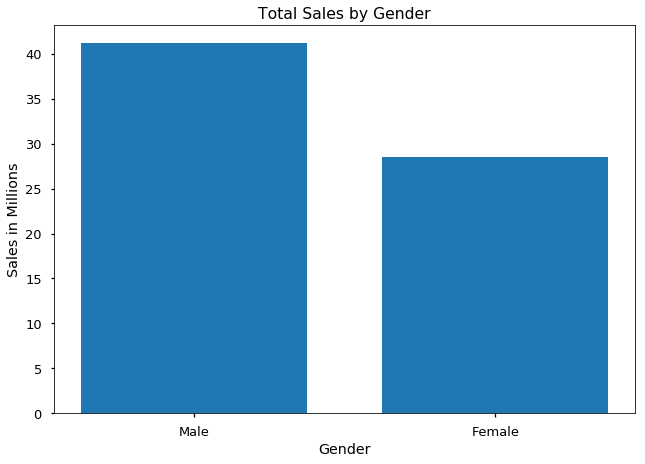

In [6]:
demographic_gender_sum = [sum(demographics['Male']), sum(demographics['Female'])]

n_groups = len(demographic_gender_sum)
index=np.arange(n_groups)
bar_width=.75

with plt.style.context('seaborn-talk'):
    both_genders = plt.bar(index, demographic_gender_sum, bar_width)
    plt.xlabel('Gender')
    plt.ylabel('Sales in Millions')
    plt.title('Total Sales by Gender')
    plt.xticks(index, ('Male', 'Female'))
    

    plt.show()

In [7]:
## Getting rid of that last row I accidently put in there
df = df[:-1]
df.tail()

,Date,Facebook_Views,Organic_Views,Youtube_Views,Facebook_Checkouts,Organic_Checkouts,Youtube_Checkouts
23,2/12/2015,4.411849,0.177,0.060,1.266053,0.033659,0.026625
24,2/13/2015,4.088695,0.085,0.051,1.073049,0.014560,0.021444
25,2/14/2015,2.595216,0.098,0.030,1.102419,0.030911,0.015651
26,2/15/2015,2.889472,0.074,0.030,1.100895,0.021821,0.014037
27,2/16/2015,3.379900,0.040,0.010,1.068442,0.017516,0.012622


In [8]:
# Adding a binary marker to designate rows that correspond to after the deal date

df['Day'] = df.Date.str.split('/').str[1].astype(int)
df['Month'] = df.Date.str.split('/').str[0].astype(int)
df['After_Sale'] = 0
df['After_Sale'][(df['Day'] > 2) & (df['Month'] == 2)] = 1
df.head()

,Date,Facebook_Views,Organic_Views,Youtube_Views,Facebook_Checkouts,Organic_Checkouts,Youtube_Checkouts,Day,Month,After_Sale
0,1/20/2015,1.187024,0.000,0.000,0.328727,0.006404,0.001255,20,1,0
1,1/21/2015,1.597861,0.154,0.543,0.636010,0.028434,0.226773,21,1,0
2,1/22/2015,1.282264,0.189,0.576,0.659165,0.041306,0.288440,22,1,0
3,1/23/2015,1.591968,0.149,0.221,0.674948,0.036470,0.242473,23,1,0
4,1/24/2015,1.766255,0.099,0.200,0.782730,0.023117,0.241911,24,1,0


In [9]:
# Split the dataset so we can make some better looking graphs
beforesale = df.loc[:13]
aftersale = df.loc[14:]

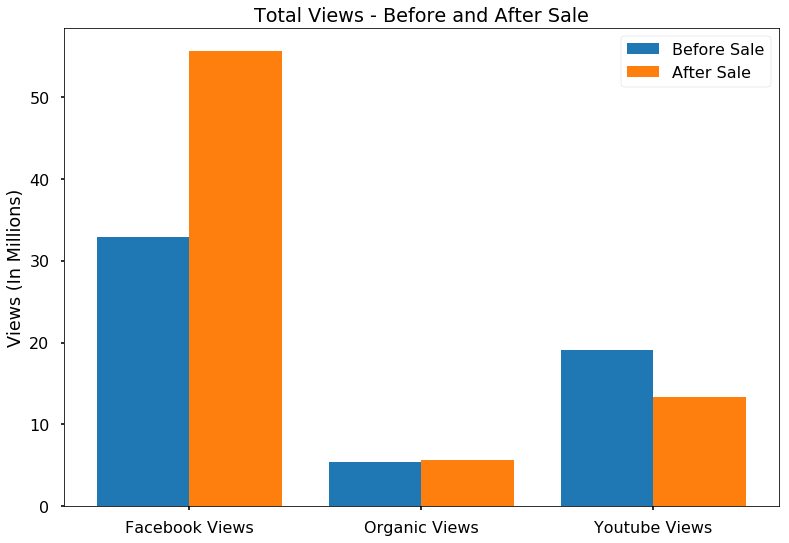

In [10]:
sums_before_views = [sum(beforesale.Facebook_Views),
        sum(beforesale.Organic_Views),
        sum(beforesale.Youtube_Views)]
sums_after_views = [sum(aftersale.Facebook_Views),
        sum(aftersale.Organic_Views),
        sum(aftersale.Youtube_Views)]

index=np.arange(len(sums_before_views))
bar_width = .4

with plt.style.context('seaborn-poster'):
    before_sale_sums_views = plt.bar(index, sums_before_views, bar_width,
                       label = 'Before Sale')
    
    after_sale_sums_views = plt.bar(index + bar_width, sums_after_views, bar_width,
                      label = 'After Sale')
               
    plt.ylabel('Views (In Millions)')
    plt.title('Total Views - Before and After Sale')
    plt.xticks(index + bar_width / 2, ('Facebook Views', 'Organic Views', 'Youtube Views'))
    plt.legend()

    plt.show()

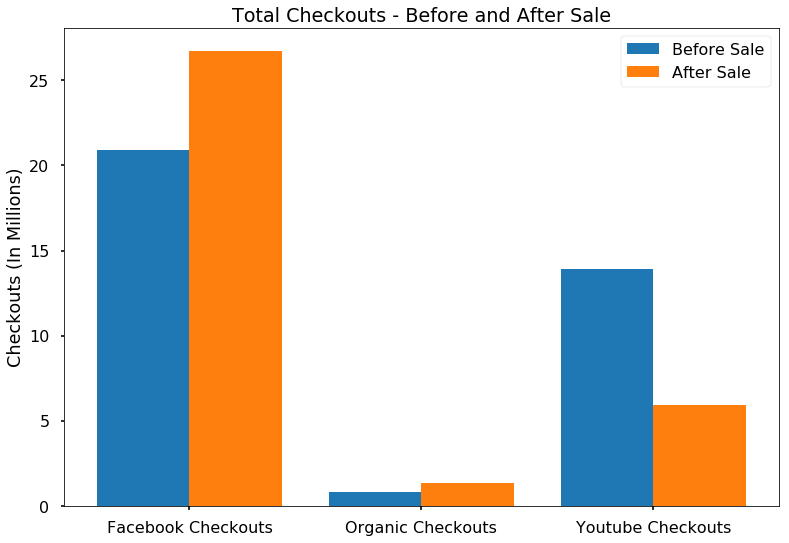

In [11]:
sums_before_checkouts = [sum(beforesale.Facebook_Checkouts),
        sum(beforesale.Organic_Checkouts),
        sum(beforesale.Youtube_Checkouts)]
sums_after_checkouts = [sum(aftersale.Facebook_Checkouts),
        sum(aftersale.Organic_Checkouts),
        sum(aftersale.Youtube_Checkouts)]

index=np.arange(len(sums_before_checkouts))
bar_width = .4

with plt.style.context('seaborn-poster'):
    before_sale_sums_checkouts = plt.bar(index, sums_before_checkouts, bar_width,
                       label = 'Before Sale')
    
    after_sale_sums_checkouts = plt.bar(index + bar_width, sums_after_checkouts, bar_width,
                      label = 'After Sale')
               
    plt.ylabel('Checkouts (In Millions)')
    plt.title('Total Checkouts - Before and After Sale')
    plt.xticks(index + bar_width / 2, ('Facebook Checkouts', 'Organic Checkouts', 'Youtube Checkouts'))
    plt.legend()

    plt.show()

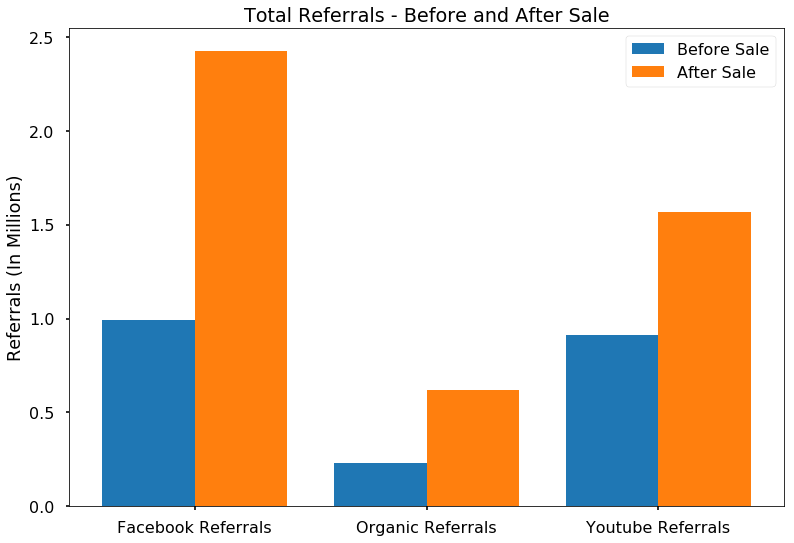

In [12]:
#Hard coded numbers from data
sums_before_referrals = [0.99, 0.23, 0.91]
sums_after_referrals = [2.43, 0.62, 1.57]

index=np.arange(len(sums_before_referrals))
bar_width = .4

with plt.style.context('seaborn-poster'):
    before_sale_sums_referrals = plt.bar(index, sums_before_referrals, bar_width,
                       label = 'Before Sale')
    
    after_sale_sums_referrals = plt.bar(index + bar_width, sums_after_referrals, bar_width,
                      label = 'After Sale')
               
    plt.ylabel('Referrals (In Millions)')
    plt.title('Total Referrals - Before and After Sale')
    plt.xticks(index + bar_width / 2, ('Facebook Referrals', 'Organic Referrals', 'Youtube Referrals'))
    plt.legend()

    plt.show()

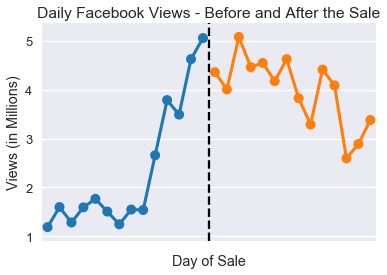

In [13]:
# Tracking the daily views
sns.set_style("darkgrid")
sns.set_context("talk")

ax = sns.pointplot(x='Date', y = 'Facebook_Views', hue = 'After_Sale', data = df, scale = .75)
ax.legend_.remove()
ax.set_xticklabels([])
plt.ylabel('Views (in Millions)')
plt.xlabel('Day of Sale')
plt.title('Daily Facebook Views - Before and After the Sale')
plt.axvline(x =13.5, color='k', linestyle = '--')
plt.show()
# We see a fairly strong increase the in the mean daily facebook-sourced views
# Although that effect is diminishing over time

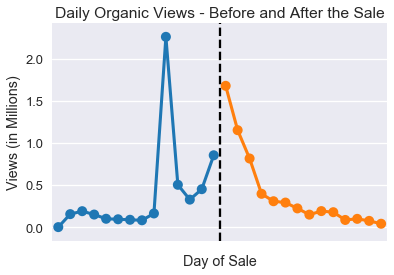

In [14]:
ax = sns.pointplot(x='Date', y = 'Organic_Views', hue = 'After_Sale', data = df, scale = .75)
ax.legend_.remove()
ax.set_xticklabels([])
plt.ylabel('Views (in Millions)')
plt.xlabel('Day of Sale')
plt.title('Daily Organic Views - Before and After the Sale')
plt.axvline(x =13.5, color='k', linestyle = '--')
plt.show()
# 10-day window of increased views centered at the day of sale
# Effect completely goes away 14 days after

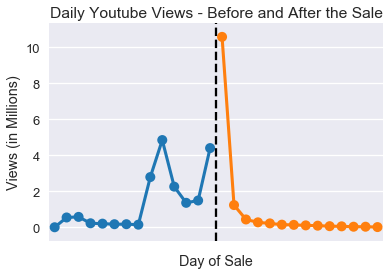

In [15]:
ax = sns.pointplot(x='Date', y = 'Youtube_Views', hue = 'After_Sale', data = df, scale = .75)
ax.legend_.remove()
ax.set_xticklabels([])
plt.ylabel('Views (in Millions)')
plt.xlabel('Day of Sale')
plt.title('Daily Youtube Views - Before and After the Sale')
plt.axvline(x =13.5, color='k', linestyle = '--')
plt.show()
# Huge spike in youtube views day of sale, but goes away almost immediately afterwards

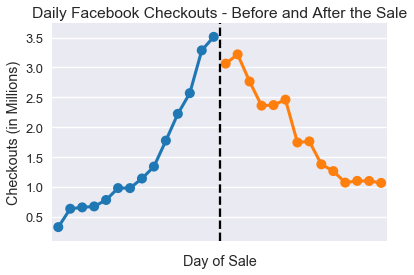

In [18]:
ax = sns.pointplot(x='Date', y = 'Facebook_Checkouts', hue = 'After_Sale', data = df, scale = .75)
ax.legend_.remove()
ax.set_xticklabels([])
plt.ylabel('Checkouts (in Millions)')
plt.xlabel('Day of Sale')
plt.title('Daily Facebook Checkouts - Before and After the Sale')
plt.axvline(x =13.5, color='k', linestyle = '--')
plt.show()
# Facebook checkouts is similar to the fb views pattern, although it diminishes more rapidly

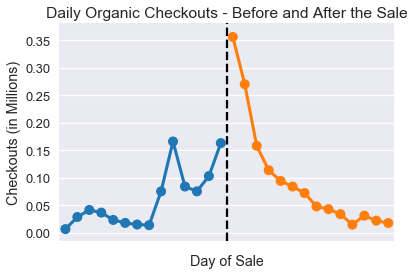

In [16]:
ax = sns.pointplot(x='Date', y = 'Organic_Checkouts', hue = 'After_Sale', data = df, scale = .75)
ax.legend_.remove()
ax.set_xticklabels([])
plt.ylabel('Checkouts (in Millions)')
plt.xlabel('Day of Sale')
plt.title('Daily Organic Checkouts - Before and After the Sale')
plt.axvline(x =13.5, color='k', linestyle = '--')
plt.show()

# We can observe a definite increase in cumalative organic checkouts comparing pre-sale and post-sale periods
# Although the organic checkout rate does seem to completely go away 14 days after

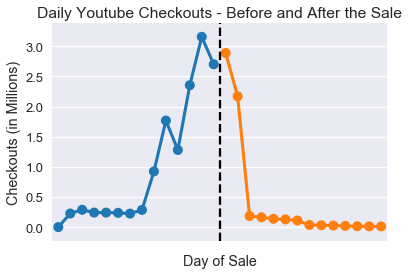

In [17]:
ax = sns.pointplot(x='Date', y = 'Youtube_Checkouts', hue = 'After_Sale', data = df, scale = .75)
ax.legend_.remove()
ax.set_xticklabels([])
plt.ylabel('Checkouts (in Millions)')
plt.xlabel('Day of Sale')
plt.title('Daily Youtube Checkouts - Before and After the Sale')
plt.axvline(x =13.5, color='k', linestyle = '--')
plt.show()

# Similar to youtube views pattern, although checkouts right before the sale are considerably greater than normal levels

In [19]:
averages_before_sale = beforesale.mean(axis=0)
averages_after_sale = aftersale.mean(axis=0)

difs = averages_after_sale - averages_before_sale
difs = difs[:-3]
difs
# Pretty much what we saw in the graphs, FB observed a massive increase in traffic
# Youtube numbers are a bit misleading bcs of the spike in traffic 3-5 days 
# before the sale which should be attributed to the sale

Facebook_Views        1.632356
Organic_Views         0.019000
Youtube_Views        -0.412429
Facebook_Checkouts    0.417363
Organic_Checkouts     0.036411
Youtube_Checkouts    -0.570701
dtype: float64

In [20]:
percent_difs = 100* (averages_after_sale - averages_before_sale)/averages_before_sale
percent_difs = percent_difs[:-3]
percent_difs
# Same thing as before, but we can see now that the % change in organic checkouts is quite significant

Facebook_Views        69.493362
Organic_Views          4.925014
Youtube_Views        -30.156160
Facebook_Checkouts    27.960492
Organic_Checkouts     60.099461
Youtube_Checkouts    -57.332877
dtype: float64

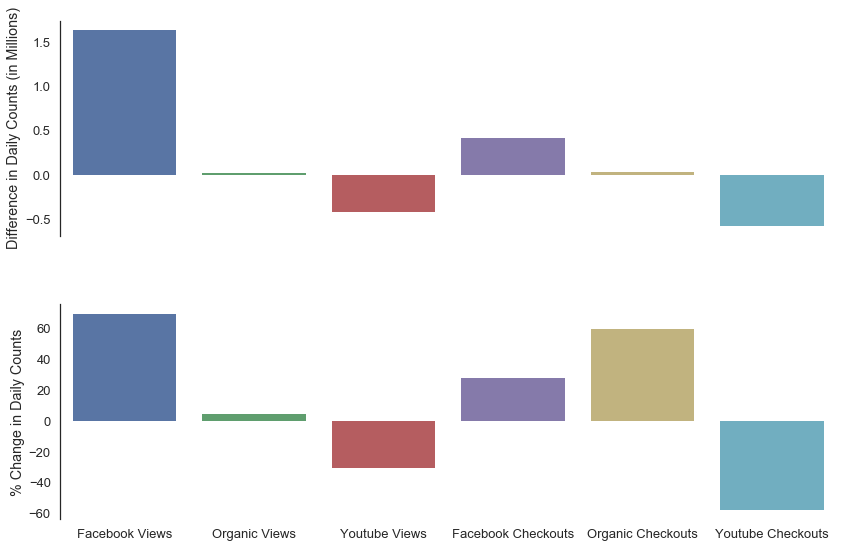

In [21]:
sns.set(style="white", context="talk")
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

x = np.arange(len(difs))

sns.barplot(x, difs, ax=ax1)
ax1.set_ylabel("Difference in Daily Counts (in Millions)")

sns.barplot(x, percent_difs, ax=ax2)
ax2.set_ylabel("% Change in Daily Counts")

sns.despine(bottom=True)

plt.xticks(x, ('Facebook Views', 'Organic Views', 'Youtube Views', 'Facebook Checkouts', 'Organic Checkouts', 'Youtube Checkouts'))
plt.tight_layout(h_pad=3)

# I thought it might be interesting to look at the differences across all groups side by side
# But once I began making my presentation, it seemed like a rather redundant piece of information to include
# Instead I included these numbers in the slides where it was a relevant figure

In [22]:
df['fb_conversions'] =  df.Facebook_Checkouts / df.Facebook_Views
df['org_conversions'] = df.Organic_Checkouts / df.Organic_Views 
df['yt_conversions'] = df.Youtube_Checkouts /  df.Youtube_Views
df.head()
conversions = df[1:]
conversions.head()
# I know that this isn't the exact definition of conversions, but I figured it might be an interesting metric to track

,Date,Facebook_Views,Organic_Views,Youtube_Views,Facebook_Checkouts,Organic_Checkouts,Youtube_Checkouts,Day,Month,After_Sale,fb_conversions,org_conversions,yt_conversions
1,1/21/2015,1.597861,0.154,0.543,0.636010,0.028434,0.226773,21,1,0,0.398039,0.184636,0.417630
2,1/22/2015,1.282264,0.189,0.576,0.659165,0.041306,0.288440,22,1,0,0.514063,0.218550,0.500764
3,1/23/2015,1.591968,0.149,0.221,0.674948,0.036470,0.242473,23,1,0,0.423971,0.244765,1.097163
4,1/24/2015,1.766255,0.099,0.200,0.782730,0.023117,0.241911,24,1,0,0.443158,0.233505,1.209555
5,1/25/2015,1.505911,0.093,0.169,0.981863,0.017688,0.237855,25,1,0,0.652006,0.190194,1.407426


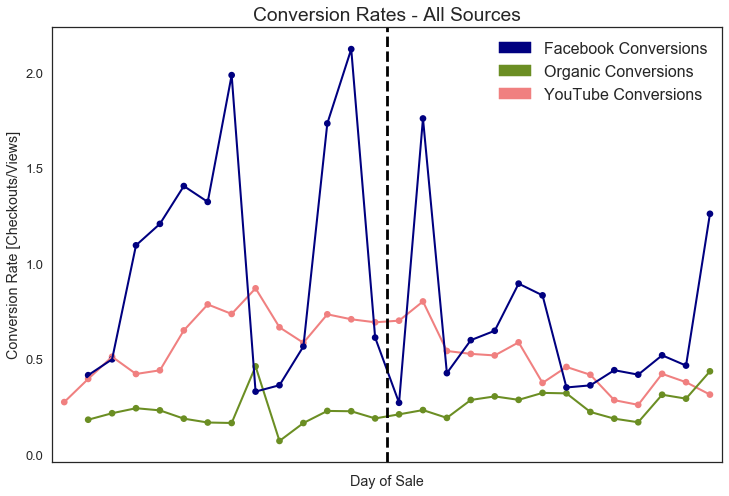

In [23]:
fig, ax = plt.subplots(figsize = (12,8))

ax1 = sns.pointplot(x='Date', y = 'fb_conversions', data = df, scale = .5, 
                   color = 'lightcoral', label = 'Facebook Conversions')
ax2 = sns.pointplot(x='Date', y = 'org_conversions', data = df, scale = .5, 
                    color = 'olivedrab', label = 'Organic Conversions')
ax3 = sns.pointplot(x='Date', y = 'yt_conversions', data = df, scale = .5, \
                     color = 'navy', label = 'YouTube Conversions')

with plt.style.context('seaborn-poster'):
    ax.set_xticklabels([])
    plt.ylabel('Conversion Rate [Checkouts/Views]')
    plt.xlabel('Day of Sale')
    plt.title('Conversion Rates - All Sources')
    
    plt.axvline(x =13.5, color='k', linestyle = '--')
    
    blue_patch = mpatches.Patch(color='navy', label='Facebook Conversions')
    green_patch = mpatches.Patch(color='olivedrab', label='Organic Conversions')
    red_patch = mpatches.Patch(color='lightcoral', label='YouTube Conversions')
    plt.legend(handles=[blue_patch, green_patch, red_patch])
    
    
    plt.show()

# I thought this might show something interesting, but it just seems rather noisy to provide meaningful analysis
# Although there is a rather steady increase in the organic conversion rate.